# Div, Grad, Curl, and All That

There is a pretty famous book in physics and math circles called [Div, Grad, Curl, and All That](https://www.amazon.com/Div-Grad-Curl-All-That/dp/0393925161) by H. M. Schey.  It's a great book, and I highly recommend it.  But, it's not free, and it's not Python.  So, I'm going to try to give you a little bit of the flavor of that book here, using Python.

The book is about vector calculus, which is a branch of mathematics that deals with functions of multiple variables.  In particular, it deals with functions that take in vectors and return vectors.  The book is about the three most important operations in vector calculus: the divergence, the gradient, and the curl.  These operations are defined in terms of the partial derivatives of the function.  So, let's start by talking about partial derivatives.

## Partial Derivatives

A partial derivative is just a derivative with respect to one variable, while holding all other variables constant.  For example, the partial derivative of $f(x,y)$ with respect to $x$ is written as $\frac{\partial f}{\partial x}$, and is defined as

$$
\frac{\partial f}{\partial x} = \lim_{h \to 0} \frac{f(x+h,y) - f(x,y)}{h}
$$

Similarly, the partial derivative of $f(x,y)$ with respect to $y$ is written as $\frac{\partial f}{\partial y}$, and is defined as

$$
\frac{\partial f}{\partial y} = \lim_{h \to 0} \frac{f(x,y+h) - f(x,y)}{h}
$$

Let's see how we can compute these in Python.  First, let's define a function $f(x,y) = x^2 + y^2$.  We'll use the `sympy` library to do this.

In [1]:
import sympy as sym
sym.init_printing()

x, y = sym.symbols('x y')
f = x**2 + y**2
f

In [2]:
# Now, let's compute the partial derivative of f with respect to x.

dfdx = sym.diff(f, x)
dfdx

In [3]:
# And, let's compute the partial derivative of f with respect to y.

dfdy = sym.diff(f, y)
dfdy

In [4]:
# Now, let's evaluate these partial derivatives at the point $(x,y) = (1,2)$.

dfdx.evalf(subs={x:1, y:2})

In [5]:
dfdy.evalf(subs={x:1, y:2})


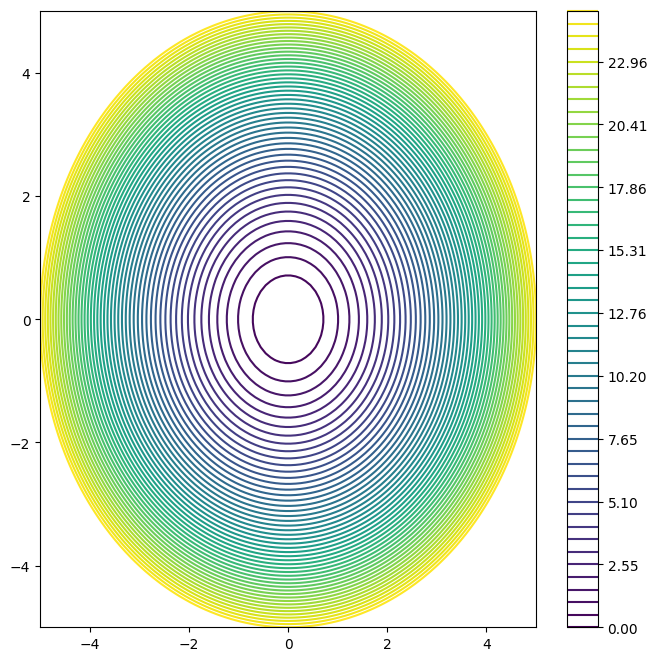

In [7]:
# Now, let's plot the function $f(x,y)$ and its partial derivatives at the point $(x,y) = (1,2)$.

import numpy as np
import matplotlib.pyplot as plt

# Create a grid of points in the x-y plane.
xvec = np.linspace(-5, 5, 100)
yvec = np.linspace(-5, 5, 100)
xmat, ymat = np.meshgrid(xvec, yvec)

# Evaluate the function f(x,y) at each point in the grid.

fmat = xmat**2 + ymat**2

# Evaluate the partial derivative of f(x,y) with respect to x at each point in the grid.

dfdxmat = 2*xmat

# Evaluate the partial derivative of f(x,y) with respect to y at each point in the grid.

dfdymat = 2*ymat

# Plot the function f(x,y).

plt.figure(figsize=(8,8))
plt.contour(xmat, ymat, fmat, levels=np.linspace(0, 25, 50))
plt.colorbar()

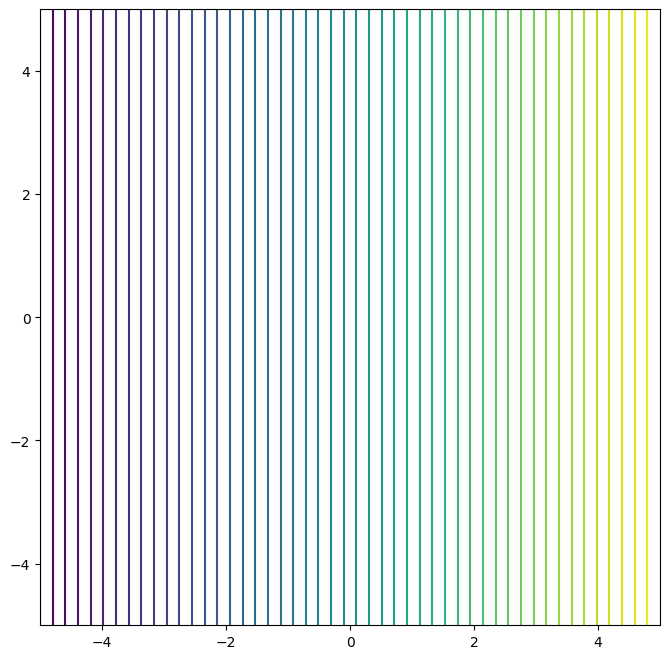

In [8]:
# Plot the partial derivative of f(x,y) with respect to x.

plt.figure(figsize=(8,8))
plt.contour(xmat, ymat, dfdxmat, levels=np.linspace(-10, 10, 50))


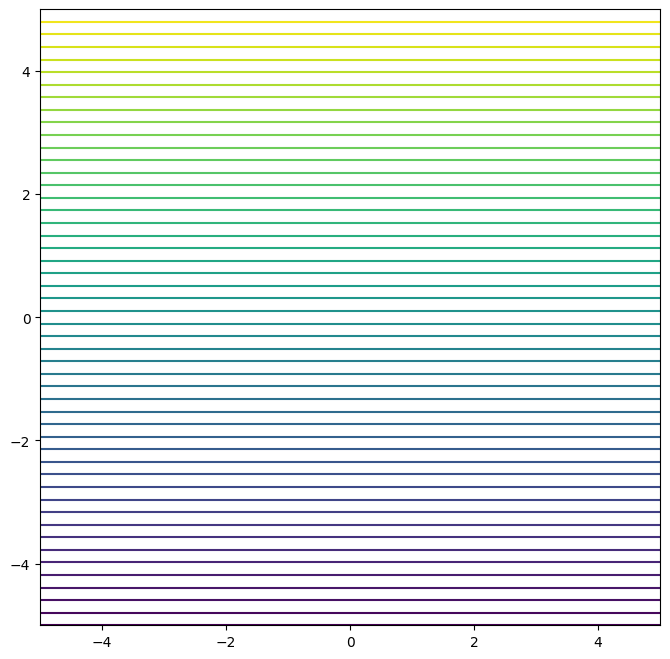

In [9]:
# Plot the partial derivative of f(x,y) with respect to y.

plt.figure(figsize=(8,8))
plt.contour(xmat, ymat, dfdymat, levels=np.linspace(-10, 10, 50))


## The Gradient

The gradient of a function $f(x,y)$ is a vector-valued function that points in the direction of steepest ascent of $f(x,y)$, and whose magnitude is the slope of $f(x,y)$ in that direction.  The gradient is defined as

$$
\nabla f = \frac{\partial f}{\partial x} \hat{x} + \frac{\partial f}{\partial y} \hat{y}

$$

where $\hat{x}$ and $\hat{y}$ are the unit vectors in the $x$ and $y$ directions, respectively.  Let's compute the gradient of $f(x,y) = x^2 + y^2$ in Python.

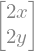

In [10]:
# First, let's define the function f(x,y) = x^2 + y^2.

f = x**2 + y**2

# Now, let's compute the gradient of f(x,y).

gradf = sym.Matrix([sym.diff(f, x), sym.diff(f, y)])
gradf

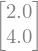

In [11]:
# Now, let's evaluate the gradient of f(x,y) at the point (x,y) = (1,2).

gradf.evalf(subs={x:1, y:2})


## The Divergence

The divergence of a vector field $\vec{F}(x,y)$ is a scalar-valued function that measures the extent to which the vector field is flowing away from or toward a point.  The divergence is defined as

$$
\nabla \cdot \vec{F} = \frac{\partial F_x}{\partial x} + \frac{\partial F_y}{\partial y}
$$

where $\vec{F} = F_x \hat{x} + F_y \hat{y}$ is the vector field, and $\hat{x}$ and $\hat{y}$ are the unit vectors in the $x$ and $y$ directions, respectively.  Let's compute the divergence of $\vec{F}(x,y) = x \hat{x} + y \hat{y}$ in Python.

In [12]:
# First, let's define the vector field F(x,y) = x*xhat + y*yhat.

F = x*sym.Matrix([1, 0]) + y*sym.Matrix([0, 1])
F

In [13]:
# Now, let's compute the divergence of F(x,y).

divF = sym.diff(F[0], x) + sym.diff(F[1], y)
divF

In [14]:
# Now, let's evaluate the divergence of F(x,y) at the point (x,y) = (1,2).

divF.evalf(subs={x:1, y:2})


# The Curl

The curl of a vector field $\vec{F}(x,y)$ is a vector-valued function that measures the extent to which the vector field is rotating about a point.  The curl is defined as

$$
\nabla \times \vec{F} = \left( \frac{\partial F_y}{\partial x} - \frac{\partial F_x}{\partial y} \right) \hat{z}

$$

where $\vec{F} = F_x \hat{x} + F_y \hat{y}$ is the vector field, and $\hat{x}$, $\hat{y}$, and $\hat{z}$ are the unit vectors in the $x$, $y$, and $z$ directions, respectively.  Let's compute the curl of $\vec{F}(x,y) = x \hat{x} + y \hat{y}$ in Python.

In [15]:
# First, let's define the vector field F(x,y) = x*xhat + y*yhat.

F = x*sym.Matrix([1, 0]) + y*sym.Matrix([0, 1])
print(F)
# Now, let's compute the curl of F(x,y).

curlF = sym.Matrix([sym.diff(F[1], x) - sym.diff(F[0], y)])
print(curlF)

# Now, let's evaluate the curl of F(x,y) at the point (x,y) = (1,2).

curlF.evalf(subs={x:1, y:2})

Matrix([[x], [y]])
Matrix([[0]])


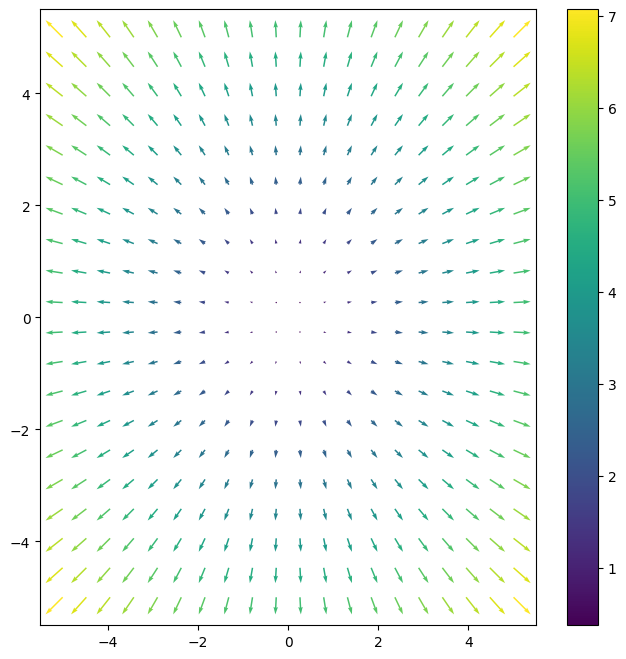

In [18]:
# Now, let's plot the vector field F(x,y) = x*xhat + y*yhat.

import numpy as np
import matplotlib.pyplot as plt

# Create a grid of points in the x-y plane.
xvec = np.linspace(-5, 5, 20)
yvec = np.linspace(-5, 5, 20)
xmat, ymat = np.meshgrid(xvec, yvec)

# Evaluate the vector field F(x,y) at each point in the grid.

Fmat = np.zeros((2, xmat.shape[0], xmat.shape[1]))

Fmat[0,:,:] = xmat
Fmat[1,:,:] = ymat

# Calculate the magnitude of the vector field F(x,y) at each point in the grid.

Fmagmat = np.sqrt(Fmat[0,:,:]**2 + Fmat[1,:,:]**2)

# Plot the vector field F(x,y).

plt.figure(figsize=(8,8))
plt.quiver(xmat, ymat, Fmat[0,:,:], Fmat[1,:,:], Fmagmat)
plt.colorbar()

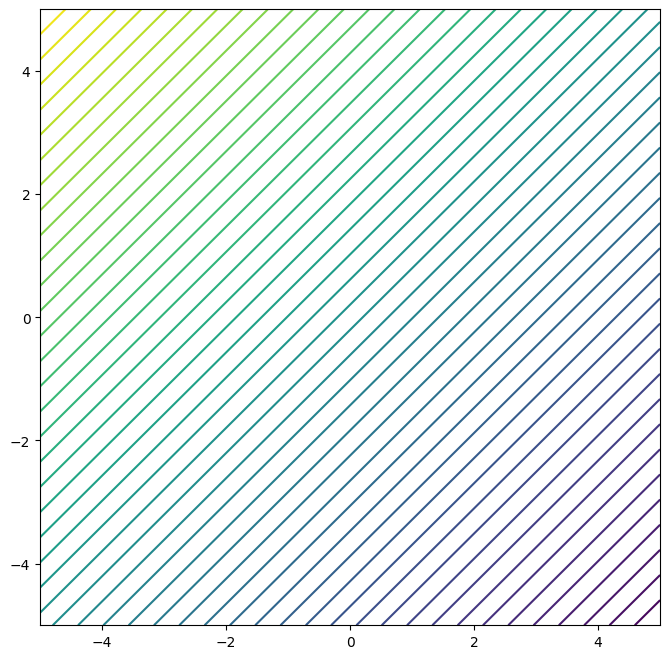

In [19]:
# Now, let's plot the curl of the vector field F(x,y) = x*xhat + y*yhat as a contour plot

# Create a grid of points in the x-y plane.
xvec = np.linspace(-5, 5, 20)
yvec = np.linspace(-5, 5, 20)
xmat, ymat = np.meshgrid(xvec, yvec)

# Evaluate the curl of the vector field F(x,y) at each point in the grid.

curlFmat = np.zeros((1, xmat.shape[0], xmat.shape[1]))

curlFmat[0,:,:] = ymat - xmat

# Plot the curl of the vector field F(x,y).

plt.figure(figsize=(8,8))
plt.contour(xmat, ymat, curlFmat[0,:,:], levels=np.linspace(-10, 10, 50))


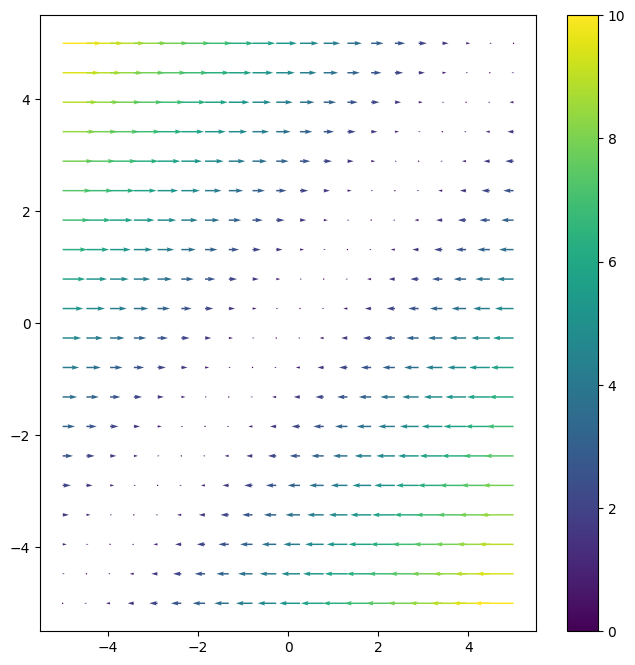

In [22]:
# plot the curl of the vector field F(x,y) = x*xhat + y*yhat as a quiver plot.

# Create a grid of points in the x-y plane.
xvec = np.linspace(-5, 5, 20)
yvec = np.linspace(-5, 5, 20)
xmat, ymat = np.meshgrid(xvec, yvec)

# Evaluate the curl of the vector field F(x,y) at each point in the grid.

curlFmat = np.zeros((1, xmat.shape[0], xmat.shape[1]))

curlFmat[0,:,:] = ymat - xmat

# Calculate the magnitude of the curl of the vector field F(x,y) at each point in the grid.

curlFmagmat = np.abs(curlFmat[0,:,:])

# Plot the curl of the vector field F(x,y).

plt.figure(figsize=(8,8))
plt.quiver(xmat, ymat, curlFmat[0,:,:], np.zeros((xmat.shape[0], xmat.shape[1])), curlFmagmat)
plt.colorbar()